In [2]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [4]:
kr3 = cv2.imread('data/train/kr3/0.jpg')

In [8]:
# kr3 = cv2.cvtColor(kr3,cv2.COLOR_BGR2RGB)

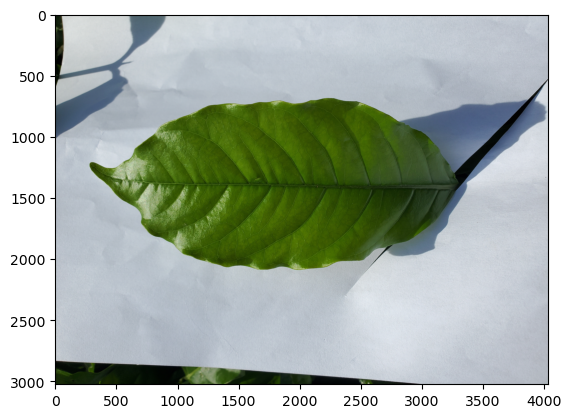

In [23]:
plt.imshow(kr3)

In [124]:
# from keras.preprocessing.image import ImageDataGenerator

In [37]:
# pip install tensorflow

In [27]:


from keras.src.legacy.preprocessing.image import ImageDataGenerator

In [33]:
image_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1/255,
                               shear_range=0.2,                             
                               horizontal_flip=True,
                               fill_mode='nearest')

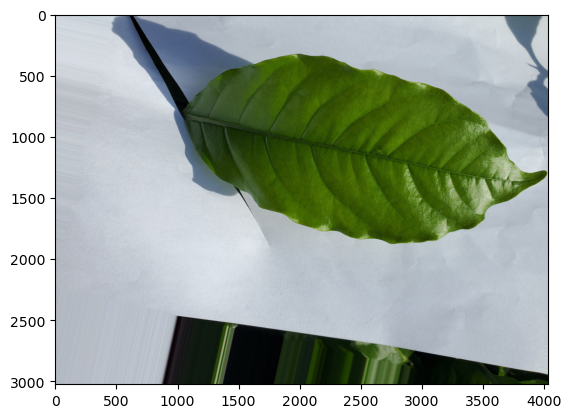

In [35]:
plt.imshow(image_gen.random_transform(kr3))

In [39]:
kr3.shape

(3024, 4032, 3)

In [97]:
image_gen.flow_from_directory('data/train', batch_size=16,)

Found 120 images belonging to 5 classes.


In [101]:
# image_gen.flow_from_directory('data/test')

In [114]:
input_shape =(1000,1000,3)

In [116]:
from keras.models import Sequential

In [118]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Activation

In [120]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))


model.add(Dropout(0.5))

model.add(Dense(5,activation='softmax'))


model.compile(loss = 'categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [122]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)                   │ (None, 997, 997, 32)        │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 498, 498, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 495, 495, 64)        │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 247, 247, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 244, 244, 64)        │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 122, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 952576)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │     243,859,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,960,997 (930.64 MB)

 Trainable params: 243,960,997 (930.64 MB)

 Non-trainable params: 0 (0.00 B)

In [156]:
batch_size=5

In [158]:
train_image_gen = image_gen.flow_from_directory('data/train',target_size=input_shape[:5],
                                                batch_size=batch_size,
                                                class_mode='categorical')

Found 120 images belonging to 5 classes.


In [160]:
test_image_gen = image_gen.flow_from_directory('data/test',target_size=input_shape[:5],
                                                batch_size=batch_size,
                                                class_mode='categorical')

Found 30 images belonging to 5 classes.


In [152]:
train_image_gen.class_indices

{'kr3': 0, 'kr5': 1, 'kr6': 2, 'kr7': 3, 'kr9': 4}

In [164]:
results = model.fit(train_image_gen,epochs=1,steps_per_epoch=1,
                             validation_data=test_image_gen,validation_steps=1)

MemoryError: Unable to allocate 172. MiB for an array with shape (5, 1000, 1000, 3, 3) and data type float32